##PROJECT 2

Identify predictive features for the price of a house.  What attributes are most relevant?

Look at: bedrooms, bathrooms, half bathrooms, landarea, and zipcode


https://towardsdatascience.com/predicting-housing-prices-using-advanced-regression-techniques-8dba539f9abe?gi=53b0101caf69


In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


In [13]:
#Import dataset DC_Properties.csv

location = "datasets/datasets/DC_Properties.csv"
df = pd.read_csv(location)
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [14]:
#show the column names in the dataset
df.columns
#or print(df.columns)

Index(['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

In [4]:
#show the data type of each column
df.dtypes

Unnamed: 0              int64
BATHRM                  int64
HF_BATHRM               int64
HEAT                   object
AC                     object
NUM_UNITS             float64
ROOMS                   int64
BEDRM                   int64
AYB                   float64
YR_RMDL               float64
EYB                     int64
STORIES               float64
SALEDATE               object
PRICE                 float64
QUALIFIED              object
SALE_NUM                int64
GBA                   float64
BLDG_NUM                int64
STYLE                  object
STRUCT                 object
GRADE                  object
CNDTN                  object
EXTWALL                object
ROOF                   object
INTWALL                object
KITCHENS              float64
FIREPLACES              int64
USECODE                 int64
LANDAREA                int64
GIS_LAST_MOD_DTTM      object
SOURCE                 object
CMPLX_NUM             float64
LIVING_GBA            float64
FULLADDRES

In [5]:
#number of non-NA values
#len(df) would count rows including NA values
df.count()

Unnamed: 0            158957
BATHRM                158957
HF_BATHRM             158957
HEAT                  158957
AC                    158957
NUM_UNITS             106696
ROOMS                 158957
BEDRM                 158957
AYB                   158686
YR_RMDL                80928
EYB                   158957
STORIES               106652
SALEDATE              132187
PRICE                  98216
QUALIFIED             158957
SALE_NUM              158957
GBA                   106696
BLDG_NUM              158957
STYLE                 106696
STRUCT                106696
GRADE                 106696
CNDTN                 106696
EXTWALL               106696
ROOF                  106696
INTWALL               106696
KITCHENS              106695
FIREPLACES            158957
USECODE               158957
LANDAREA              158957
GIS_LAST_MOD_DTTM     158957
SOURCE                158957
CMPLX_NUM              52261
LIVING_GBA             52261
FULLADDRESS           106040
CITY          

In [19]:
#descriptive statistics
df.describe()

,Unnamed: 0,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
count,158957.000000,158957.000000,158957.000000,106696.000000,158957.000000,158957.000000,158686.000000,80928.000000,158957.000000,106652.000000,...,158957.000000,158957.000000,52261.000000,52261.000000,158956.000000,158956.000000,158956.000000,158956.000000,158720.000000,158720.000000
mean,79478.000000,1.810678,0.458237,1.198039,6.187736,2.732506,1941.987579,1998.243537,1963.718024,2.091793,...,14.252999,2473.282158,2371.544249,888.834542,20012.694563,38.914854,-77.016676,5348.216324,-77.016712,38.914846
std,45887.077707,0.976396,0.587571,0.596924,2.618165,1.358864,33.640234,16.575786,24.923150,2.933323,...,3.725736,5059.046023,1114.272364,420.185822,15.627084,0.031723,0.040938,3369.645953,0.040933,0.031682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1800.000000,0.000000,...,11.000000,0.000000,1001.000000,0.000000,20001.000000,38.819731,-77.113909,100.000000,-77.113135,38.820576
25%,39739.000000,1.000000,0.000000,1.000000,4.000000,2.000000,1918.000000,1985.000000,1954.000000,2.000000,...,11.000000,697.000000,1501.000000,616.000000,20007.000000,38.895425,-77.042892,2102.000000,-77.042894,38.895432
50%,79478.000000,2.000000,0.000000,1.000000,6.000000,3.000000,1937.000000,2004.000000,1963.000000,2.000000,...,13.000000,1649.000000,2265.000000,783.000000,20011.000000,38.915337,-77.019596,5201.000000,-77.019581,38.915229
75%,119217.000000,2.000000,1.000000,1.000000,7.000000,3.000000,1960.000000,2010.000000,1975.000000,2.000000,...,17.000000,3000.000000,2910.000000,1060.000000,20018.000000,38.936075,-76.988626,8302.000000,-76.988842,38.936077
max,158956.000000,14.000000,11.000000,6.000000,48.000000,24.000000,2019.000000,2019.000000,2018.000000,826.000000,...,117.000000,942632.000000,5621.000000,8553.000000,20392.000000,38.995540,-76.909758,11100.000000,-76.910511,38.993646


In [18]:
#show rows with missing values
missing = df_missing['AYB'].isnull()
#missing will only show True/False values
df_missing.loc[missing]

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
3252,3252,2,1,Forced Air,Y,2.0,7,3,NaN,NaN,...,-77.023357,Old City 2,040 C Old City 2,4901.0,004901 2001,Ward 6,396,-77.023410,38.911456,NW
4034,4034,3,0,Hot Water Rad,N,2.0,16,5,NaN,NaN,...,-77.030598,Old City 2,040 E Old City 2,5001.0,NaN,Ward 2,240,-77.030601,38.911885,NW
4302,4302,2,0,Forced Air,Y,1.0,7,3,NaN,NaN,...,-77.019466,Old City 2,040 B Old City 2,4802.0,004802 2000,Ward 6,480,-77.019503,38.907983,NW
4922,4922,2,2,Forced Air,Y,2.0,10,6,NaN,NaN,...,-77.029098,Old City 2,040 F Old City 2,4400.0,004400 1004,Ward 1,271,-77.028681,38.919947,NW
5126,5126,4,0,Forced Air,Y,4.0,8,4,NaN,2006.0,...,-77.014938,Old City 2,040 A Old City 2,4600.0,004600 2001,Ward 5,550,-77.014584,38.912813,NW
5213,5213,4,1,Forced Air,Y,1.0,10,4,NaN,NaN,...,-77.019436,Old City 2,040 G Old City 2,4801.0,004801 1001,Ward 6,475,-77.019277,38.914287,NW
5786,5786,2,1,Warm Cool,Y,1.0,7,3,NaN,NaN,...,-77.001133,Old City 1,039 J Old City 1,8301.0,008301 1002,Ward 6,777,-77.001216,38.899468,NE
6145,6145,1,1,Forced Air,Y,1.0,5,2,NaN,2002.0,...,-77.000798,Capitol Hill,009 A Capitol Hill,7000.0,007000 1005,Ward 6,795,-77.001190,38.881818,SE
6355,6355,1,1,Forced Air,Y,1.0,6,3,NaN,2000.0,...,-77.012394,Old City 1,039 E Old City 1,6400.0,006400 2004,Ward 6,601,-77.012694,38.871424,SW
6891,6891,7,0,Forced Air,Y,3.0,13,7,NaN,NaN,...,-77.002241,Old City 1,039 K Old City 1,8301.0,008301 2003,Ward 6,754,-77.002807,38.896684,NE


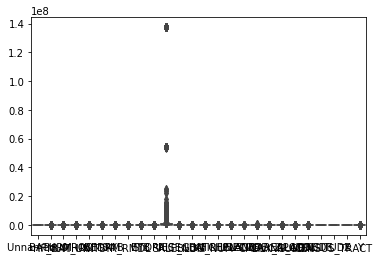

In [22]:
#boxplot showing stats for each characteristic
sns.boxplot(data=df)

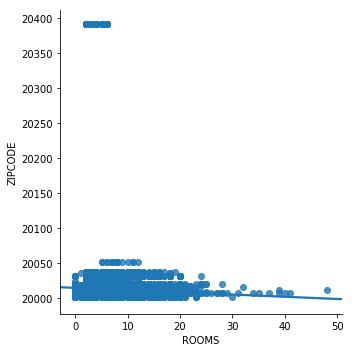

In [21]:
#make a scatterplot
sns.lmplot(x='ROOMS', y='ZIPCODE', data=df)

In [24]:
import statsmodels.formula.api as smf

In [30]:
df.corr()

,Unnamed: 0,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
Unnamed: 0,1.000000,-0.378389,-0.358454,-0.051664,-0.585978,-0.598538,0.438398,-0.115391,-0.133335,-0.043577,...,0.299741,-0.207757,0.097378,0.027510,0.141489,-0.210494,0.106993,0.161255,0.106642,-0.211284
BATHRM,-0.378389,1.000000,0.248759,0.403431,0.677751,0.655563,-0.039087,0.239797,0.269444,0.042349,...,0.121070,0.287648,0.213538,0.717903,-0.063410,0.130588,-0.184810,-0.196311,-0.184997,0.129822
HF_BATHRM,-0.358454,0.248759,1.000000,-0.151393,0.353825,0.375568,-0.009372,0.148483,0.235645,0.033270,...,-0.229586,0.212534,0.057939,0.484198,-0.020164,0.126221,-0.058719,-0.072888,-0.058819,0.126238
NUM_UNITS,-0.051664,0.403431,-0.151393,1.000000,0.524724,0.330551,-0.104280,-0.015551,-0.069551,0.019268,...,0.797330,-0.038679,NaN,NaN,-0.099460,-0.117125,0.037280,0.060408,0.037291,-0.117025
ROOMS,-0.585978,0.677751,0.353825,0.524724,1.000000,0.841309,-0.219367,0.161396,0.158847,0.039352,...,-0.042795,0.348184,0.049562,0.761722,-0.053109,0.120238,0.006756,-0.075593,0.006399,0.119712
BEDRM,-0.598538,0.655563,0.375568,0.330551,0.841309,1.000000,-0.242955,0.214655,0.168913,0.040859,...,-0.131676,0.321066,0.146936,0.721204,-0.071962,0.144971,0.028338,-0.072028,0.028024,0.144723
AYB,0.438398,-0.039087,-0.009372,-0.104280,-0.219367,-0.242955,1.000000,0.021678,0.660668,-0.011098,...,0.078079,-0.040503,0.201515,0.117381,0.175098,-0.122697,0.032979,0.115762,0.033361,-0.122607
YR_RMDL,-0.115391,0.239797,0.148483,-0.015551,0.161396,0.214655,0.021678,1.000000,0.256227,-0.001643,...,-0.094586,0.049021,0.546581,0.118424,-0.098040,0.044246,0.145658,0.069060,0.145585,0.044158
EYB,-0.133335,0.269444,0.235645,-0.069551,0.158847,0.168913,0.660668,0.256227,1.000000,0.040214,...,-0.059968,0.081796,0.246490,0.109064,0.041599,-0.082219,0.005107,0.036704,0.005332,-0.082212
STORIES,-0.043577,0.042349,0.033270,0.019268,0.039352,0.040859,-0.011098,-0.001643,0.040214,1.000000,...,0.020700,-0.009711,NaN,NaN,-0.026886,-0.003654,-0.031842,-0.025058,-0.031842,-0.003597


In [34]:
result = smf.ols('PRICE ~ ROOMS + YR_RMDL + ZIPCODE + WARD + AYB', data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sat, 09 Mar 2019   Prob (F-statistic):               0.00
Time:                        12:04:16   Log-Likelihood:            -1.0046e+06
No. Observations:               57630   AIC:                         2.009e+06
Df Residuals:                   57618   BIC:                         2.009e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.318e+08   1.11e+08     -1.186      0.236    -3.5e+08    8.61e+07
WARD[T.Ward 2]  8.523e+05   1.39e+05      6.123      0.000    5.79e+05    1.13e+06
WARD[T.Ward 3]  3.914e+06   1.45e+05     27.019      0.000    3.63e+06     4.2e+06
WARD[T.Ward 4] -4886.2954   1.54e+05     -0.032      0.975   -3.06e+05    2.97e+05
WARD[T.Ward 5] -7.175e+04   1.51e+05     -0.474      0.635   -3.68e+05    2.25e+05
WARD[T.Ward 6]  3.356e+05   1.36e+05      2.476      0.013    6.99e+04    6.01e+05
WARD[T.Ward 7] -7.382e+05   1.77e+05     -4.167      0.000   -1.09e+06   -3.91e+05
WARD[T.Ward 8] -8.316e+05   2.22e+05     -3.738      0.000   -1.27e+06   -3.96e+05
ROOMS          -1.568e+05   1.51e+04    -10.357      0.000   -1.86e+05   -1.27e+05
YR_RMDL         4.036e+04   2497.234     16.162      0.000    3.55e+04    4.53e+04
ZIPCODE         -127.9230   5547.151     -0.023      0.982    -1.1e+04    1.07e+04
AYB              2.85e+04   1431.558     19.910      0.000    2.57e+04    3.13e+04
==============================================================================
Omnibus:                   102742.725   Durbin-Watson:                   0.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         85094470.329
Skew:                          13.254   Prob(JB):                         0.00
Kurtosis:                     189.373   Cond. No.                     5.99e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.99e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'

Remove all non-numeric data; then look at price row to decide which fields to include in regression.


In [ ]:
set coefficient to 0
result = smf.ols(formula='grade ~ age + exercise + hours - 1', data=df).fit()
result.summary()

In [36]:
#drop non-numeric columns   (TRY TYPE)
df.drop('HEAT', 'AC', 'ASSESSMENT_NBHD,'ASSESSMENT_SUBNBHD',axis=1)

SyntaxError: invalid syntax (<ipython-input-36-dd11b78a7ba4>, line 2)

In [35]:
#drop completely empty columns (all NaN/null values)
df.dropna(axis=1, how='all')

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
5,5,3,2,Hot Water Rad,Y,1.0,10,5,1913.0,NaN,...,-77.039715,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
6,6,1,0,Warm Cool,Y,2.0,5,2,1917.0,1988.0,...,-77.041055,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
7,7,3,1,Hot Water Rad,Y,2.0,8,4,1906.0,2011.0,...,-77.040129,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
8,8,3,1,Warm Cool,Y,2.0,7,3,1908.0,2008.0,...,-77.039903,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
9,9,1,1,Hot Water Rad,Y,1.0,6,2,1908.0,1979.0,...,-77.040081,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
